In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Business Understanding 1

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

# Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [2]:
hotel = pd.read_csv("data/hotel_bookings.csv",low_memory=False)

In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# hotel["arrival_date_month"] = hotel["arrival_date_month"].replace({"January":1,"February":2,
#                                                                   "March":3,"April":4,
#                                                                   "May":5,"June":6,
#                                                                   "July":7,"August":8,
#                                                                   "September":9,"October":10,
#                                                                   "November":11,"December":12})

One hot encode "hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type' but first make sure you check for dups

drop company column and reservation_status_date

remove NA rows for agent

In [7]:
# dropping company column as there isn't enough data 
del hotel['company']
del hotel['country']

#### Checking for duplicates

In [8]:
pd.set_option("display.max_columns", 101)


In [9]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


#### Dropping NA values from agent 

the loss of data is not significant

In [18]:
hotel=hotel.dropna(subset=['agent',"children"])

In [19]:
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  object 
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  int64  
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal            

# EDA

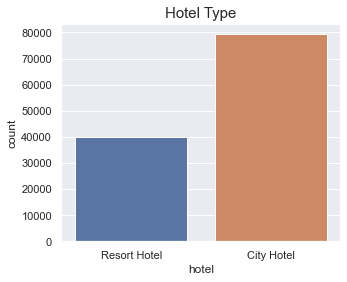

In [6]:
# Count for both hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=hotel, x = 'hotel')
plt.show()

<AxesSubplot:xlabel='hotel', ylabel='count'>

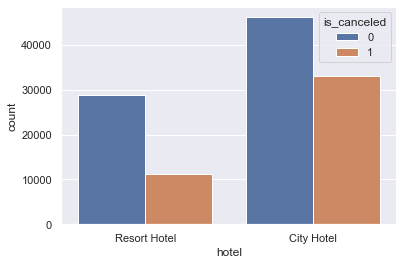

In [7]:
sns.countplot(data=hotel, x = 'hotel', hue='is_canceled')

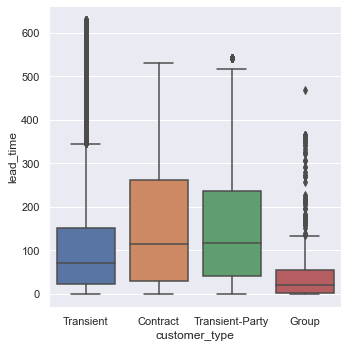

In [120]:
sns.catplot(x="customer_type", y="lead_time",kind="box", data=hotel)

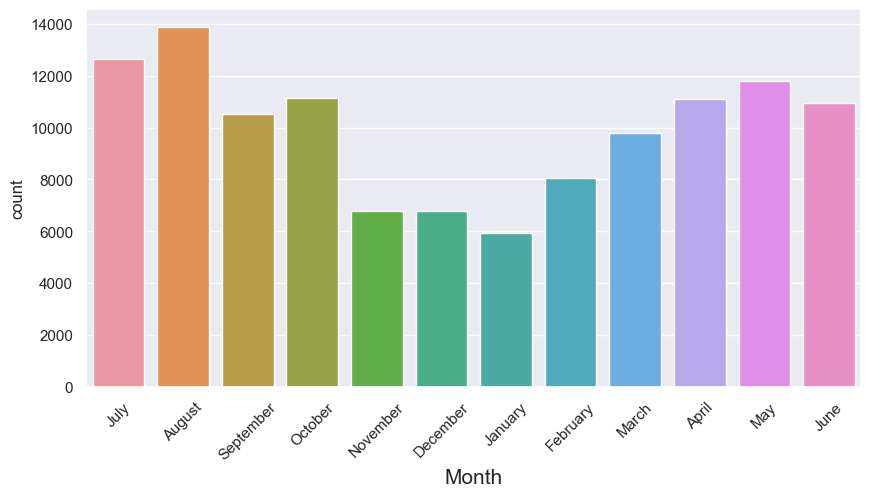

In [8]:
#Count of Hotel Bookings by Month
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=hotel, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

<AxesSubplot:xlabel='adults', ylabel='Density'>

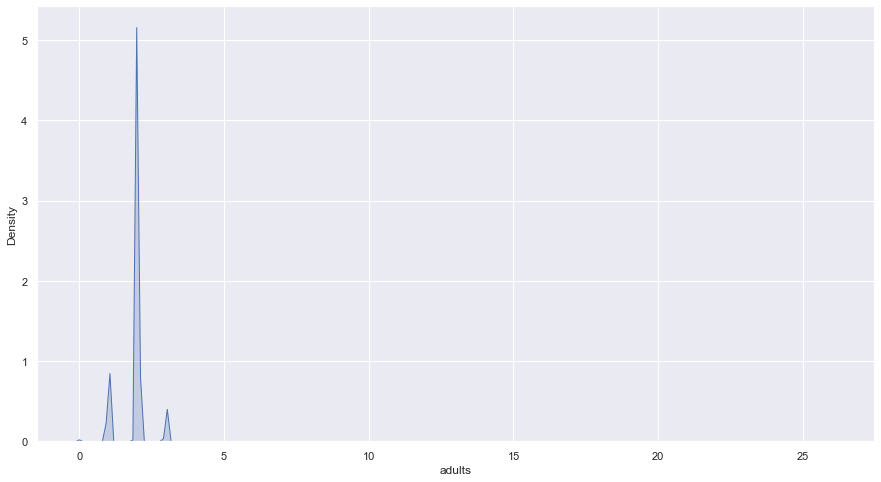

In [122]:
plt.figure(figsize=(15,8))
sns.kdeplot(hotel["adults"],shade=True)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

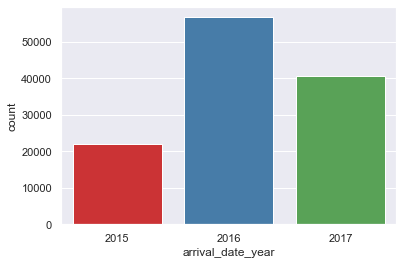

In [9]:
#Count of hotel Booking by year
sns.countplot(data=hotel, x=hotel['arrival_date_year'], palette='Set1')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

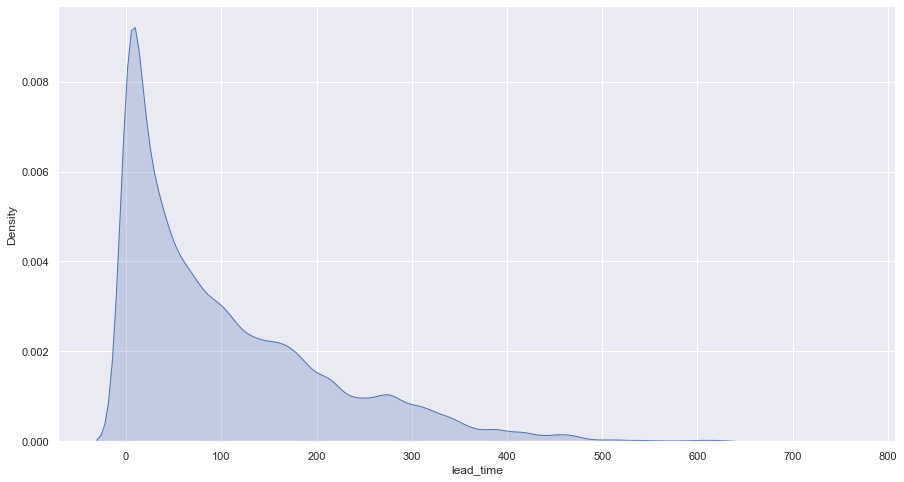

In [11]:
plt.figure(figsize=(15,8))
sns.kdeplot(hotel["lead_time"],shade=True)

In [10]:
hotel_cols= (hotel.columns).tolist()

In [82]:
cont_hotel=hotel[['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']]

In [84]:
cont_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     103048 non-null  int64  
 1   lead_time                       103048 non-null  int64  
 2   arrival_date_year               103048 non-null  int64  
 3   arrival_date_month              103048 non-null  int64  
 4   arrival_date_week_number        103048 non-null  int64  
 5   arrival_date_day_of_month       103048 non-null  int64  
 6   stays_in_weekend_nights         103048 non-null  int64  
 7   stays_in_week_nights            103048 non-null  int64  
 8   adults                          103048 non-null  int64  
 9   children                        103048 non-null  float64
 10  babies                          103048 non-null  int64  
 11  is_repeated_guest               103048 non-null  int64  
 12  previous_cancell

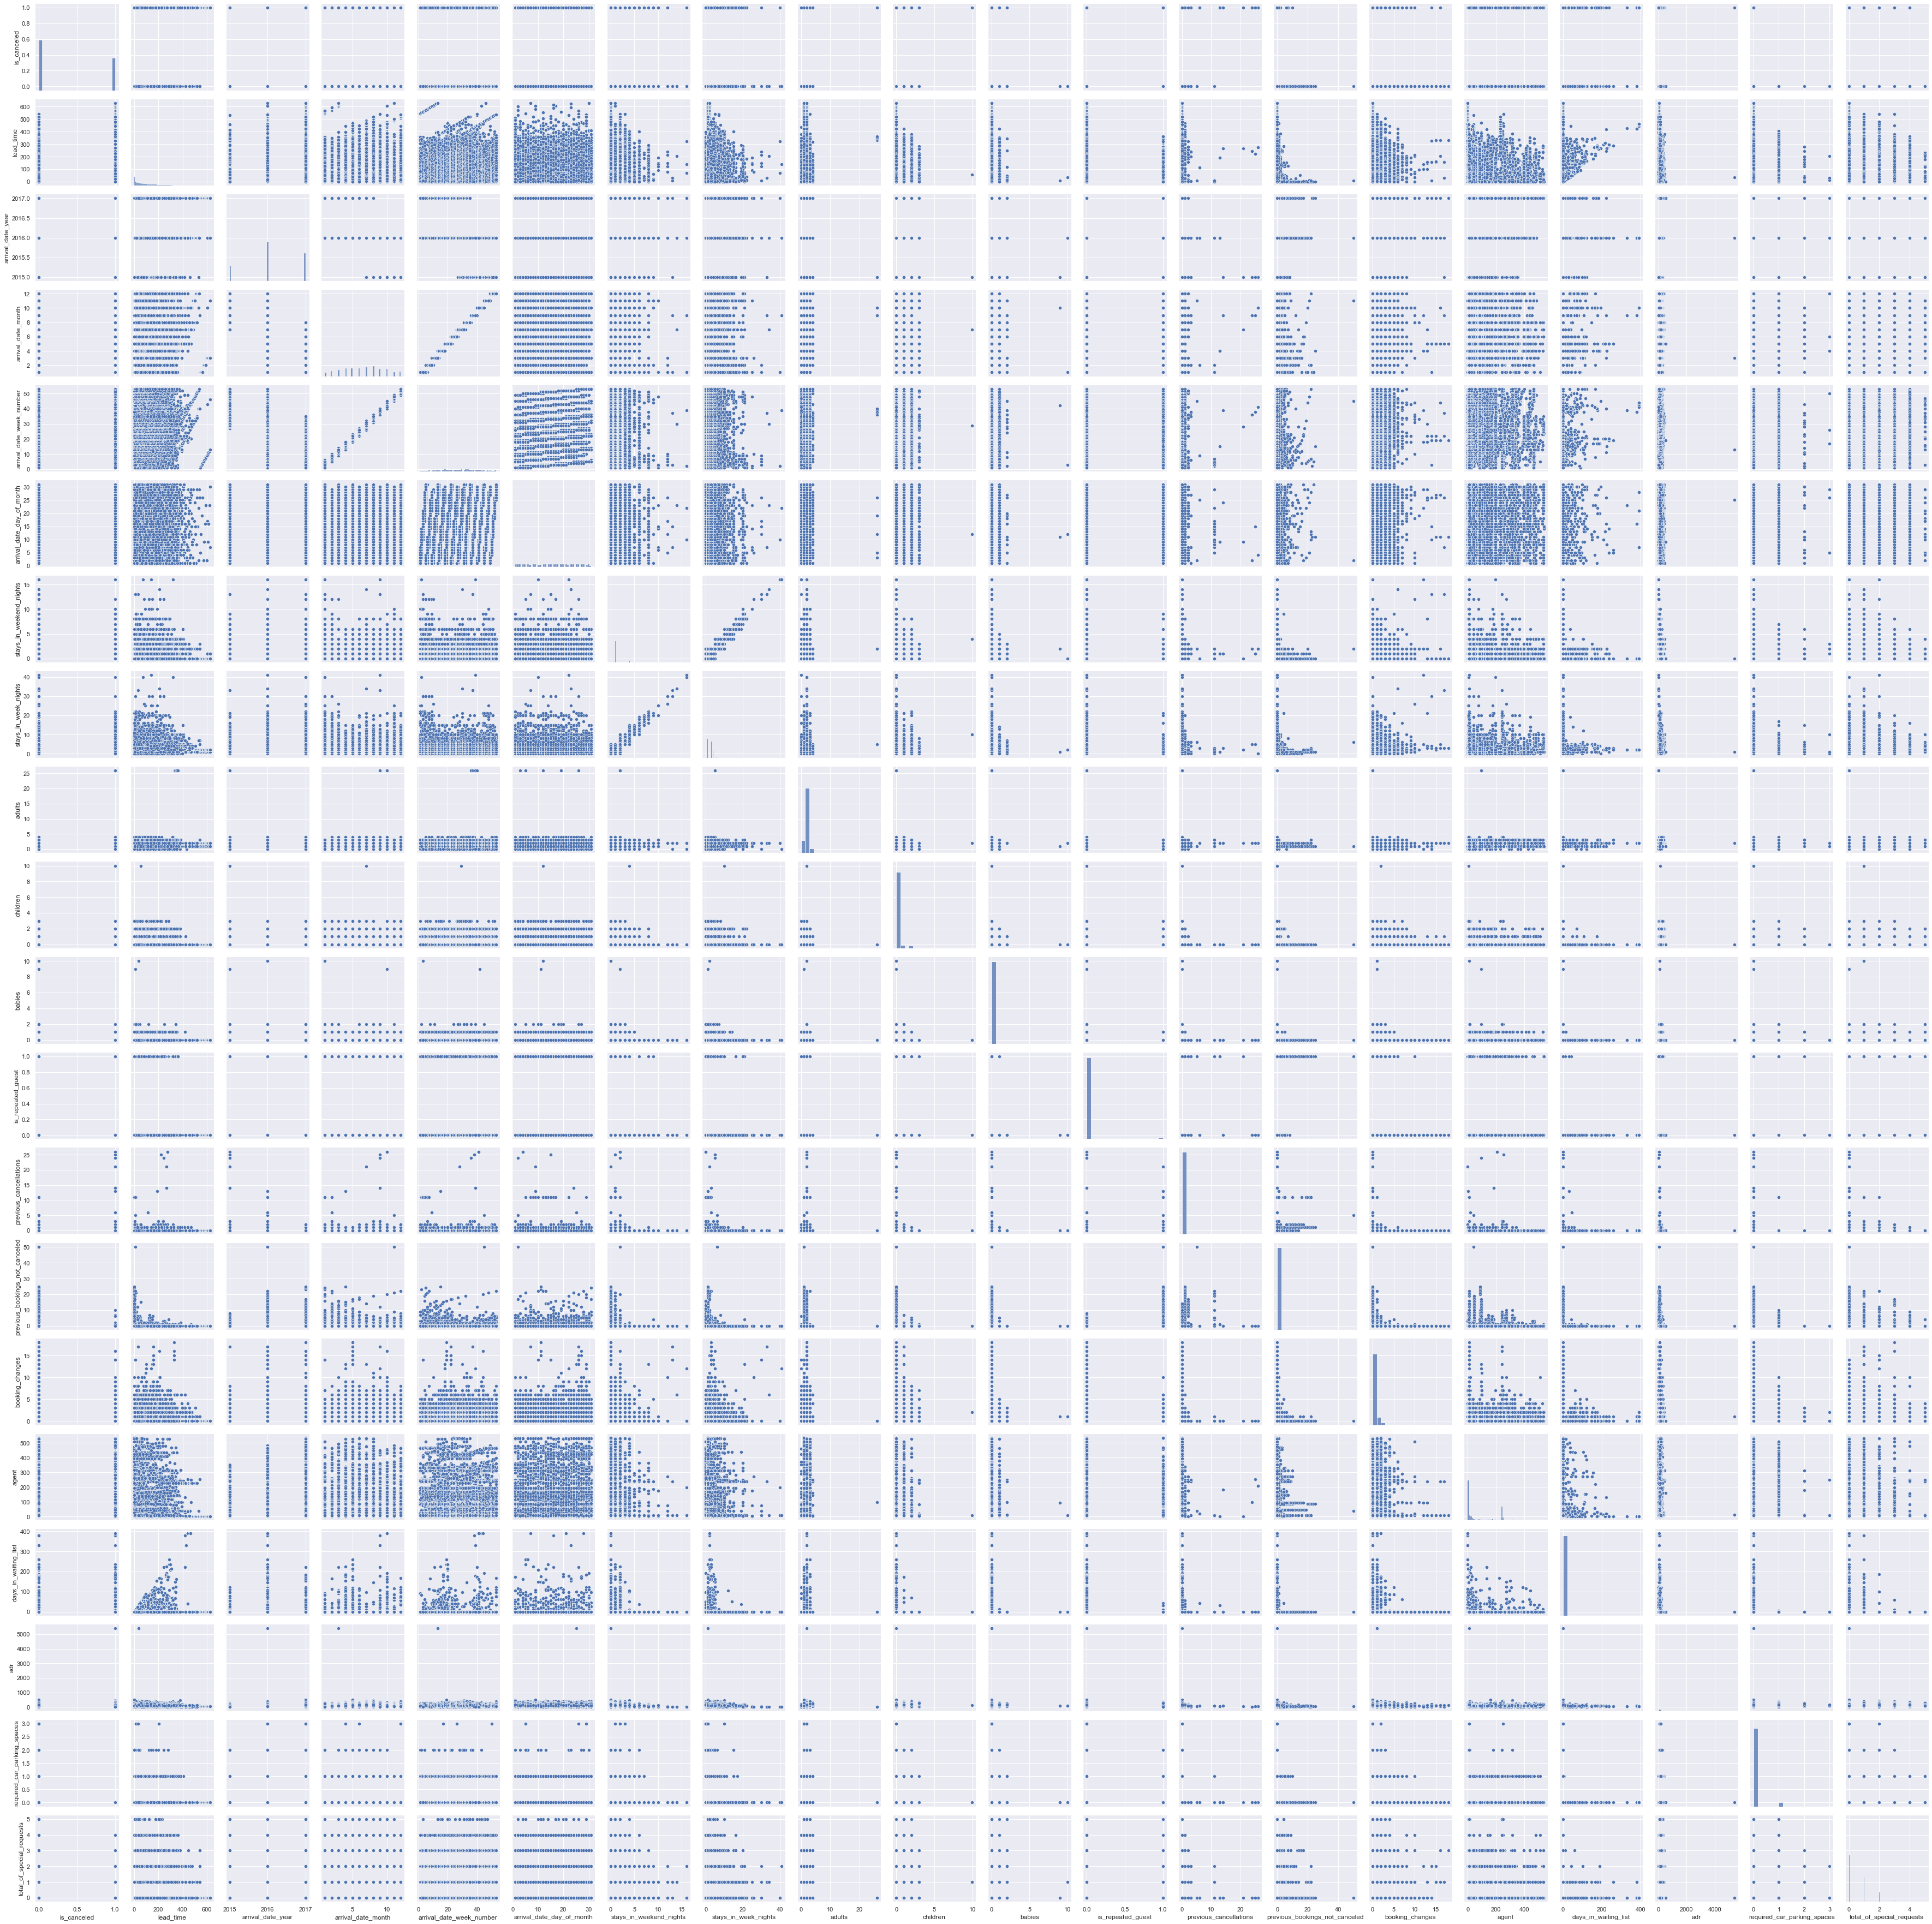

In [85]:
g = sns.PairGrid(cont_hotel)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [125]:
cont_hotel.reset_index(inplace=True,drop=True)
cont_hotel

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
2,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
3,0,9,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.00,0,1
4,1,85,2015,7,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103043,0,23,2017,8,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
103044,0,102,2017,8,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
103045,0,34,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
103046,0,109,2017,8,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


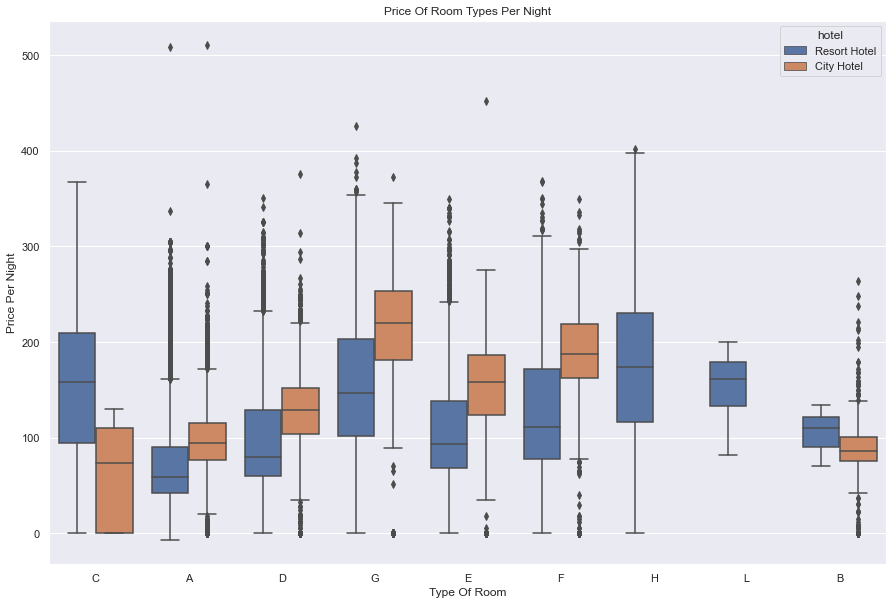

In [12]:
#Distribution of price of each room type
plt.figure(figsize=(15,10))
sns.boxplot(data=hotel[hotel['is_canceled'] == 0],x='reserved_room_type',y='adr',hue='hotel')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

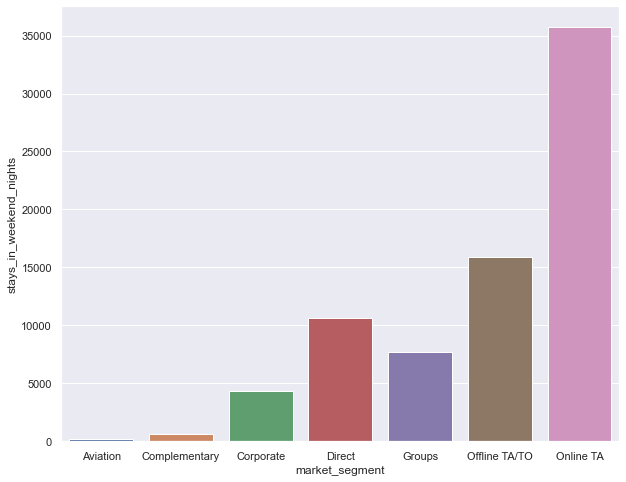

In [13]:
#Analysing preference of guests
plt.figure(figsize=(10,8))
sns.barplot(x=hotel[hotel['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=hotel[hotel['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

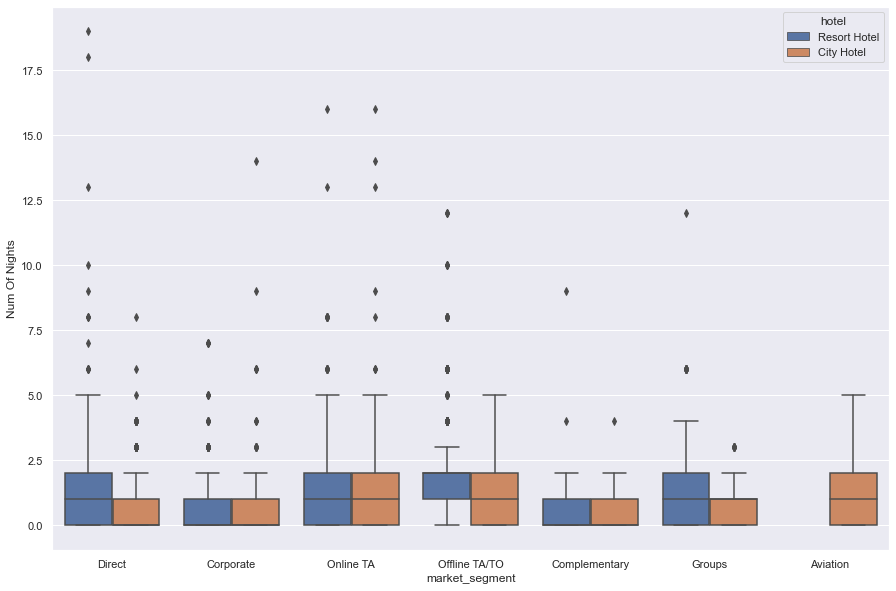

In [14]:
#Distribution of nights spent at hotels by market segment and hotel type
plt.figure(figsize=(15,10))
sns.boxplot(data=hotel[hotel['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Num Of Nights')
plt.show()

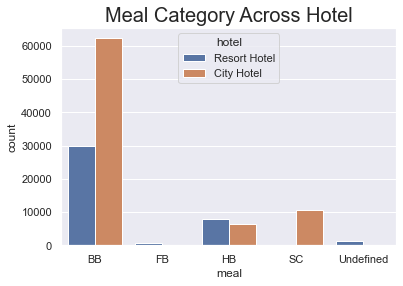

In [15]:
#Meal Category acroos the two hotel types
sns.countplot(data = hotel, x = 'meal', hue='hotel')
plt.title('Meal Category Across Hotel', fontdict={'fontsize' : 20})
plt.show()

#### One hot encoding

"hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type'

In [45]:
#one hot encoding using get dummies
categorical_features = ["hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type']

tmp_df = pd.get_dummies(hotel.hotel,prefix="hotel")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.arrival_date_month,prefix="arrival_date_month")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.customer_type,prefix="customer_type")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.reservation_status,prefix="reservation_status")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.deposit_type,prefix="deposit_type")
hotel = pd.concat((hotel,tmp_df),axis=1)

tmp_df = pd.get_dummies(hotel.market_segment,prefix="market_segment")
hotel = pd.concat((hotel,tmp_df),axis=1)

#delete the extra columns
del hotel['hotel']
del hotel['arrival_date_month']
del hotel['customer_type']
del hotel['reservation_status']
del hotel['deposit_type']
del hotel['market_segment']
hotel.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_1,arrival_date_month_2,arrival_date_month_3,arrival_date_month_4,arrival_date_month_5,arrival_date_month_6,arrival_date_month_7,arrival_date_month_8,arrival_date_month_9,arrival_date_month_10,arrival_date_month_11,arrival_date_month_12,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,0,342,2015,27,1,0,0,2,0.0,0,BB,Direct,0,0,0,C,C,3,NaN,0,0.0,0,0,2015-07-01,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,BB,Direct,0,0,0,C,C,4,NaN,0,0.0,0,0,2015-07-01,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,BB,Direct,0,0,0,A,C,0,NaN,0,75.0,0,0,2015-07-02,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,BB,Corporate,0,0,0,A,A,0,304.0,0,75.0,0,0,2015-07-02,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,BB,TA/TO,0,0,0,A,A,0,240.0,0,98.0,0,1,2015-07-03,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [17]:
hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_Non Refund,deposit_type_Refundable,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


# Data Understanding 2

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

In [16]:
#show arrival monnth vs total time stayed (total week nights+ total week days)

# Modeling and Evaluation 1

train and adjust parameters (GridSearch)

# Modeling and Evaluation 2

evaluate and compare

# Modeling and Evaluation 3

Visualize

# Modeling and Evaluation 4

Summarize and ramifications

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?


# Exceptional Work

You have free reign to provide additional analyses or combine analyses.